In [1]:
import numpy as np
from matplotlib import pyplot
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
%matplotlib inline 

In [2]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
iris_data =pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"]=iris.target
iris_data.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
iris_data.shape #part of EDA

(150, 5)

In [5]:
iris_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [6]:
iris_data.rename(columns={'sepal length (cm)':'sepal_length',
                          'sepal width (cm)':'sepal_width',
                          'petal length (cm)':'petal_length',
                          'petal width (cm)':'petal_width'},inplace = True)

In [7]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris_data['target']#iris_data.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [9]:
iris_data.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [10]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
tar_new = []
def delta_tar(data):
   for i in range(len(data)):
      if data[i] == 0:
         tar_new.append('setosa')
      elif data[i] == 1:
         tar_new.append('versicolor')
      else:
         tar_new.append('virginica')
   return tar_new

iris_data =pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"]=iris.target
iris_data.rename(columns={'sepal length (cm)':'sepal_length',
                          'sepal width (cm)':'sepal_width',
                          'petal length (cm)':'petal_length',
                          'petal width (cm)':'petal_width'},inplace = True)


iris_data.insert(5,"species",delta_tar(iris_data['target']),True)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


we will now select "versicolor" to predict its "petal_width" using "petal_length " as one of the parameter.So your next task is to make a new DataFrame named "data" having only rows whose species values are 'versicolor'.

In [12]:
data = iris_data[iris_data.species == 'versicolor']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [13]:
data.shape

(50, 6)

In [14]:
data.drop(columns=['target','species','sepal_length','sepal_width'],axis = 1,inplace=True)
data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24284\1029018917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['target','species','sepal_length','sepal_width'],axis = 1,inplace=True)


,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


In [15]:
data.head()

,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


In [16]:
data.shape

(50, 2)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

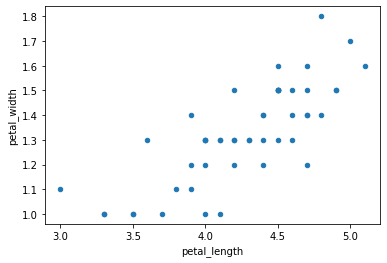

In [17]:
data.plot.scatter(x = 'petal_length', y = 'petal_width')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

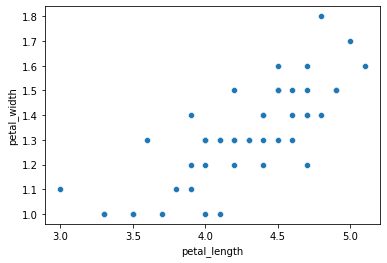

In [18]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = data)
#Here the scatterplot is plotted using seaborn

<function matplotlib.pyplot.show(close=None, block=None)>

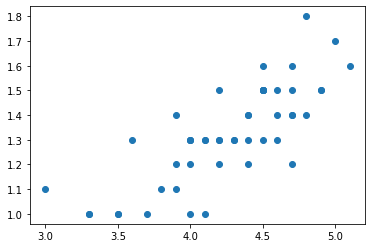

In [19]:
import matplotlib.pyplot as plt
plt.scatter(data.petal_length, data.petal_width)
plt.show
#scatterplot using matplotlib

In [20]:
from sklearn.model_selection import train_test_split
X=data['petal_length'].values.reshape(-1,1)
Y=data['petal_width'].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.33,random_state=1)

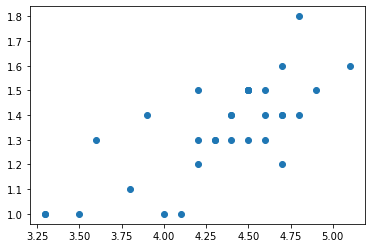

In [21]:
plt.scatter(X_train, Y_train)
plt.show()

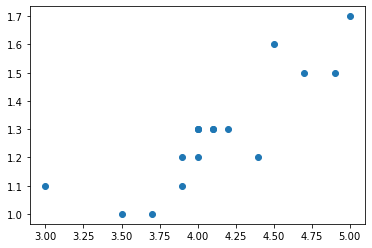

In [22]:
plt.scatter(X_test,Y_test)
plt.show()

In [23]:
X_new = X_train.flatten()

In [25]:
Y_new = Y_train.flatten()#flatten function coverts 2D array to 1D array

In [26]:
dictionary = {'X_Train':X_new,
              'Y_Train':Y_new}
df = pd.DataFrame(dictionary)
df.head()

,X_Train,Y_Train
0,4.8,1.4
1,4.9,1.5
2,4.7,1.4
3,4.6,1.4
4,4.1,1.0


In [27]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(df[['X_Train']],df.Y_Train)

LinearRegression()

In [28]:
regr.coef_

array([0.3338594])

In [29]:
regr.intercept_

-0.1022812051649924

Now we can overlay the predicted line and test data points to see where the predicted point lies.

In [30]:
df.head()

,X_Train,Y_Train
0,4.8,1.4
1,4.9,1.5
2,4.7,1.4
3,4.6,1.4
4,4.1,1.0


In [31]:
df.astype(float)

,X_Train,Y_Train
0,4.8,1.4
1,4.9,1.5
2,4.7,1.4
3,4.6,1.4
4,4.1,1.0
5,4.2,1.2
6,4.3,1.3
7,4.7,1.2
8,4.6,1.5
9,5.1,1.6


In [32]:
df.dtypes

X_Train    float64
Y_Train    float64
dtype: object

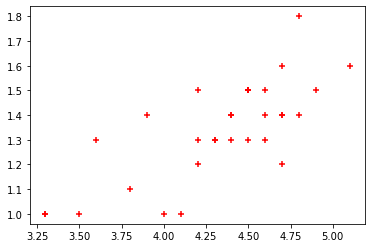

In [33]:
import matplotlib.pyplot as plt
plt.scatter(df.X_Train, df.Y_Train, color = 'red', marker = '+')
plt.show()


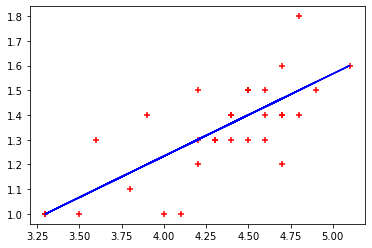

In [34]:
import matplotlib.pyplot as plt
plt.xlabel = 'sepal_len_train'
plt.ylabel = 'sepal_wid_train'
plt.scatter(df.X_Train, df.Y_Train, color = 'red', marker = '+')
plt.plot(df.X_Train,regr.predict(df[['X_Train']]), color = 'blue')
plt.show()

Let's plot the above line on test data and check how it is fitting

In [35]:
lst2 = list(zip(X_test,Y_test))
lst2 #the zip function returns tuple

[(array([5.]), array([1.7])),
 (array([4.5]), array([1.6])),
 (array([4.4]), array([1.2])),
 (array([4.1]), array([1.3])),
 (array([4.9]), array([1.5])),
 (array([4.]), array([1.3])),
 (array([3.]), array([1.1])),
 (array([3.5]), array([1.])),
 (array([4.2]), array([1.3])),
 (array([3.7]), array([1.])),
 (array([3.9]), array([1.2])),
 (array([4.]), array([1.3])),
 (array([4.]), array([1.3])),
 (array([4.7]), array([1.5])),
 (array([3.9]), array([1.1])),
 (array([4.]), array([1.2])),
 (array([4.1]), array([1.3]))]

In [36]:
df2 = pd.DataFrame(lst2, columns = ['X_Test','Y_Test'])
df2.head()

,X_Test,Y_Test
0,[5.0],[1.7]
1,[4.5],[1.6]
2,[4.4],[1.2]
3,[4.1],[1.3]
4,[4.9],[1.5]


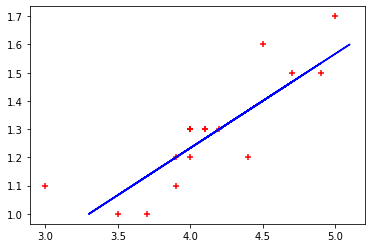

In [37]:
%matplotlib inline
plt.xlabel = 'sepal_len_test'
plt.ylabel = 'sepal_wid_test'

plt.scatter(df2.X_Test, df2.Y_Test, color = 'red', marker = '+')
plt.plot(df.X_Train,regr.predict(df[['X_Train']]), color = 'blue')

The above plot shows us how the Linear Regression model fits into the test data, we can see here that it coincides with 2 test points and is very close to few of them.